# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
pip install Faker

In [2]:
import pandas as pd
import random
employee_df = pd.DataFrame(columns = ['employee_id', 'employee_name','last_name','phone','state'])
salary_df = pd.DataFrame(columns = ['employee_id', 'department_id','yearly_salary'])
department_df = pd.DataFrame(columns = ['department_id', 'department_name'])

In [24]:
from faker import Faker
fake = Faker()
employeeid = []
first_name = []
last_name=[]
phone = []
states = ['Connecticut','Delaware','Florida','Georgia','Maine','Maryland','Massachusetts','New Hampshire','New Jersey','New York','North Carolina','Pennsylvania','Rhode Island','South Carolina','Virginia']
state=[]
department_id = []
yearly_salary = []
department=[]
department_name = []
mydept={1:'HR',
        2:'IT',
        3:'Sales',
        4:'Finance',
        5:'Marketing'}

for i in range(10000):
    employeeid.append(i+1)
    first_name.append(fake.first_name())
    last_name.append(fake.last_name())
    phone.append(fake.street_address())
    state.append(random.choice(states))
    yearly_salary.append(random.randint(10000,200000000))
    department_id.append(random.randint(1,10))
    
    
employee_df['employee_id']=employeeid 
employee_df['employee_name']=first_name
employee_df['last_name']=last_name
employee_df['phone']=phone
employee_df['state']=state

salary_df['employee_id']=employeeid
salary_df['department_id']=department_id
salary_df['yearly_salary']=yearly_salary

department_df['department_id']=mydept.keys()
department_df['department_name']=mydept.values()


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

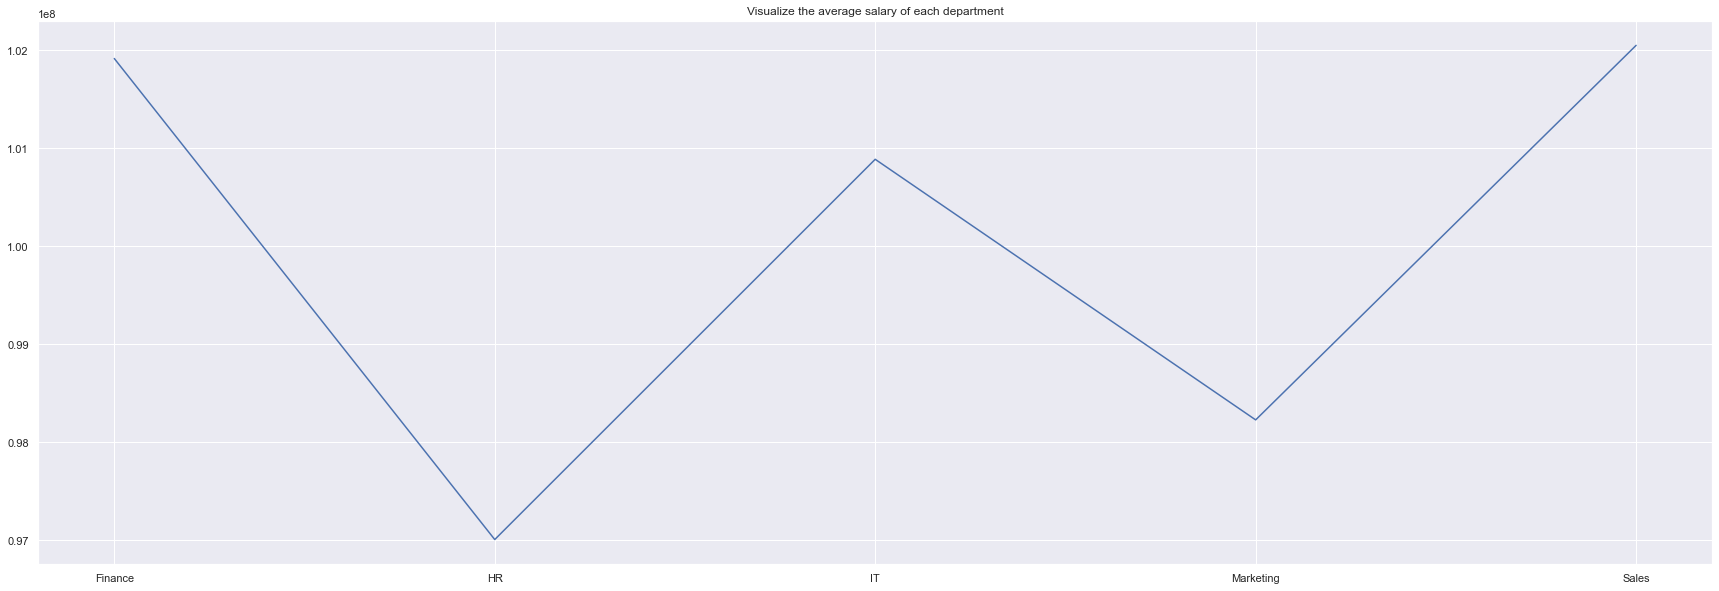

In [77]:
#Visualize the average salary of each department
df=salary_df.merge(department_df, on = 'department_id')
df1=df.groupby('department_name').agg({'yearly_salary':'mean'})
plt.plot(df1)
plt.title("Visualize the average salary of each department")
plt.show() 

<AxesSubplot:xlabel='state,department_name'>

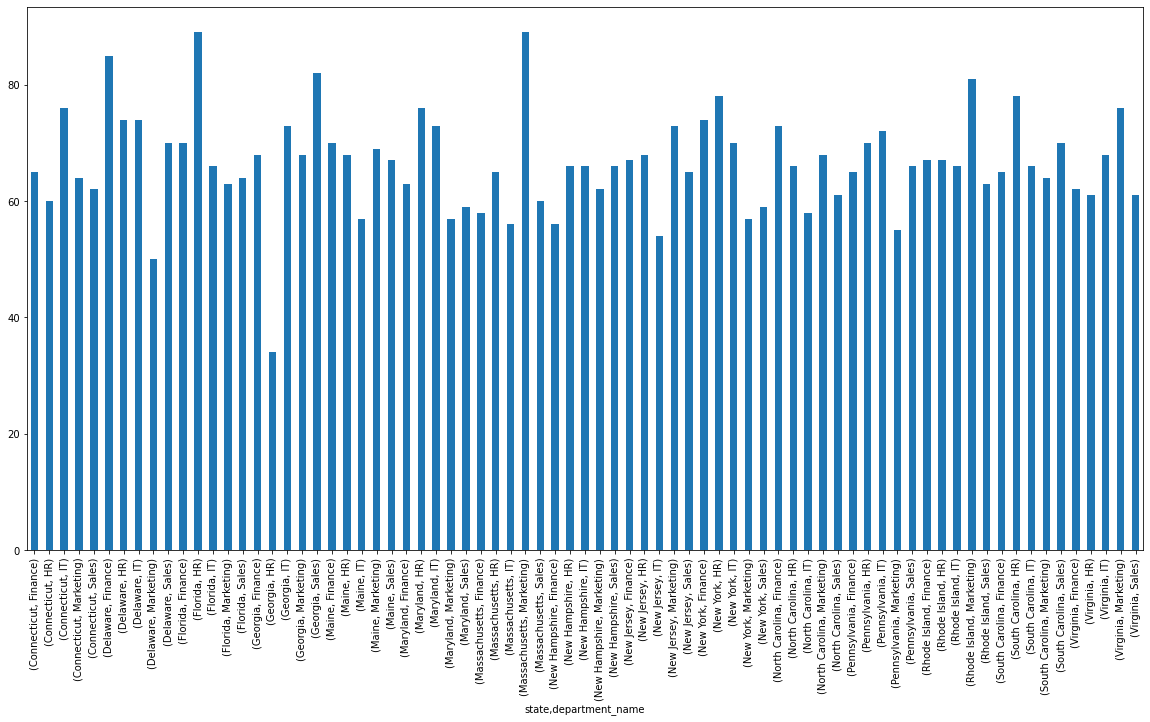

In [46]:
#Visualize the total number of employees living in each state for each department
df5 = employee_df.merge(df,on='employee_id')
df6 = df5.groupby(['state', 'department_name']).size()
df6.plot(kind='bar',figsize=(20,10))


Text(0.5, 1.0, 'Visualize salary distribution of different states')

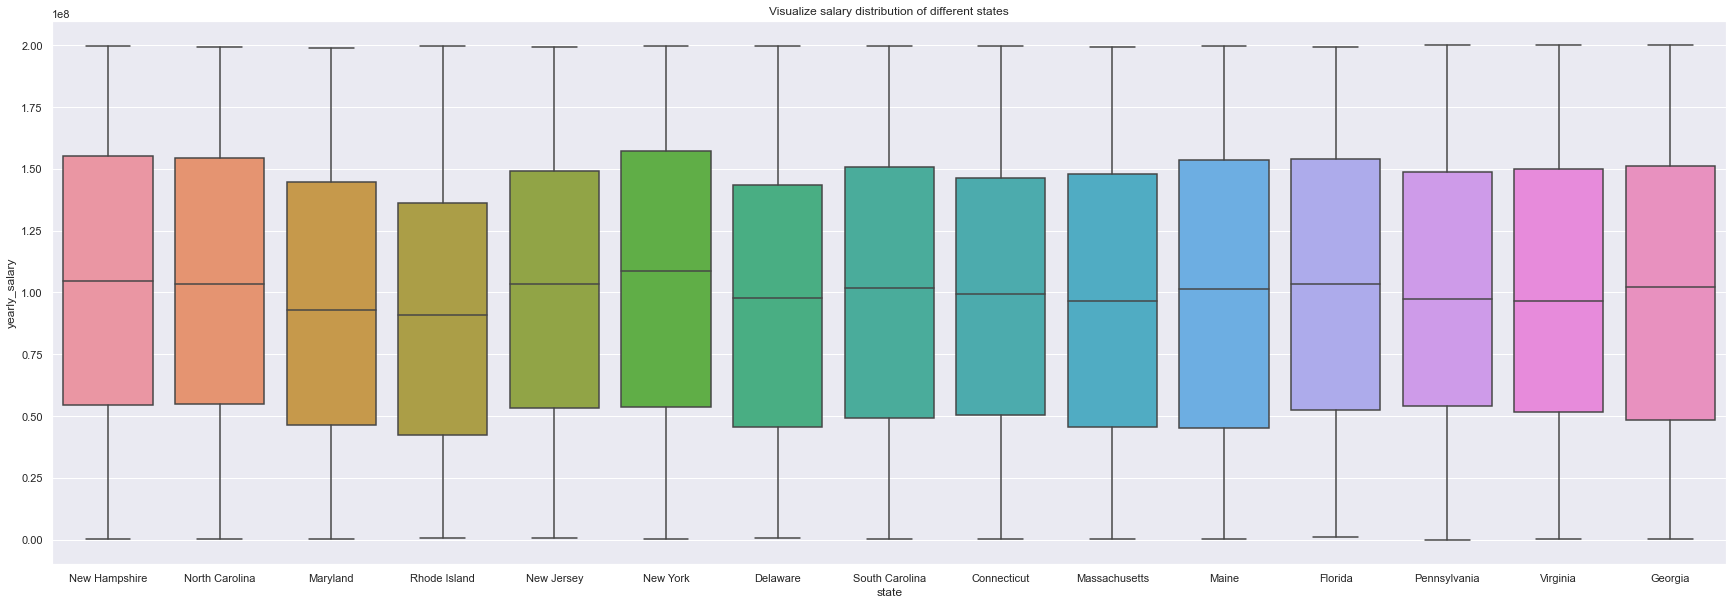

In [81]:
#Visualize salary distribution of different states
df3=employee_df.merge(salary_df, on = 'employee_id')
plot = sns.boxplot(x="state", y="yearly_salary", data = df3)
sns.set(rc={"figure.figsize":(30, 10)})
plot.set_title('Visualize salary distribution of different states')

Text(0.5, 1.0, 'Visualize salary distribution of different departments')

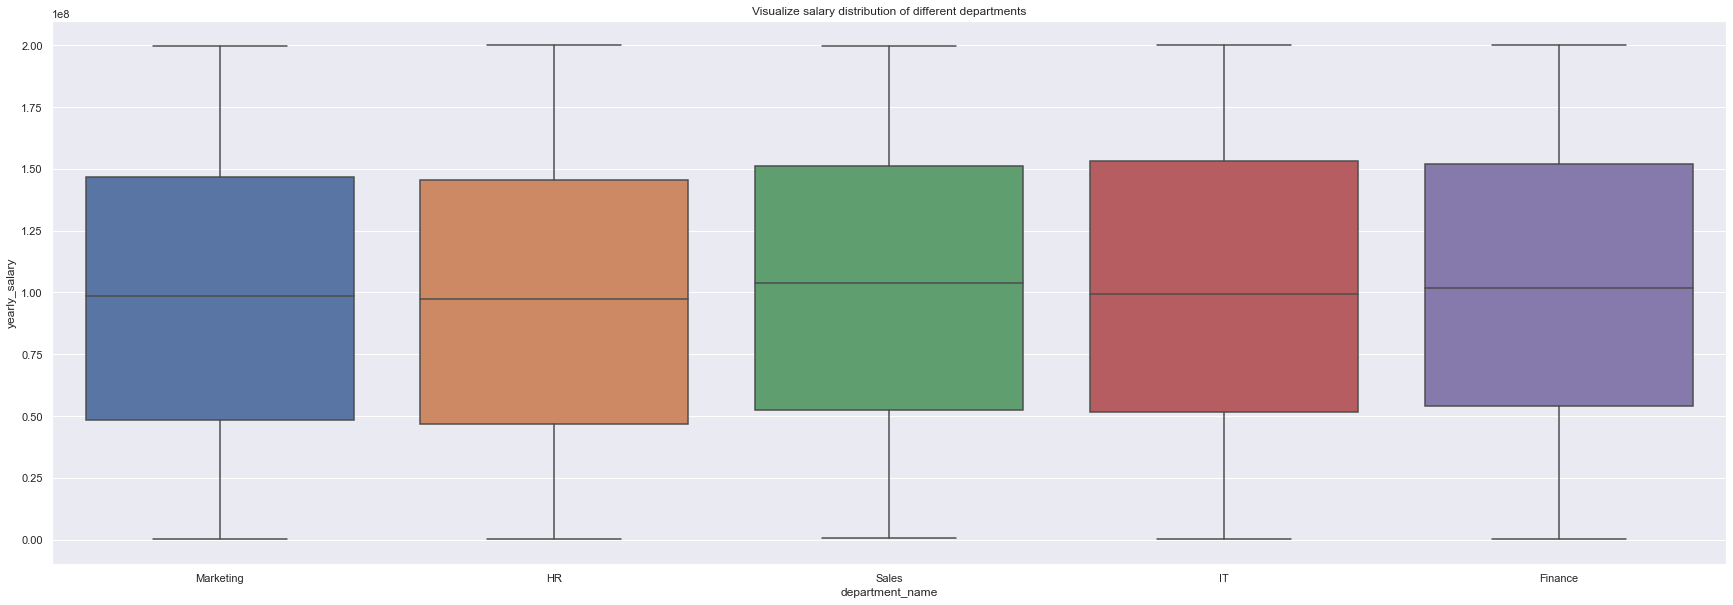

In [83]:
#Visualize salary distribution of different departments
plot = sns.boxplot(x="department_name", y="yearly_salary", data = df)
sns.set(rc={"figure.figsize":(30, 10)})
plot.set_title('Visualize salary distribution of different departments')